In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import  LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score , r2_score

# 1. Reading & Data Preprocessing


#### a. Read the data

In [2]:
cd /kaggle/input/telco-data-dataset

/kaggle/input/telco-data-dataset


In [3]:
data=pd.read_csv("telco_data.csv")

#### b. Explore and understand the data

In [4]:
data.head()

,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge,X..customer.Service.Calls,Churn,trainrows
0,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,No
1,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,Yes
2,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,Yes
3,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,Yes
4,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   International.Plan         5000 non-null   object 
 1   Voice.Mail.Plan            5000 non-null   object 
 2   X..Vmail.Messages          5000 non-null   int64  
 3   Total.Day.Minutes          5000 non-null   float64
 4   Total.Day.Calls            5000 non-null   int64  
 5   Total.Day.Charge           5000 non-null   float64
 6   Total.Eve.Minutes          5000 non-null   float64
 7   Total.Eve.Calls            5000 non-null   int64  
 8   Total.Eve.Charge           5000 non-null   float64
 9   Total.Night.Minutes        5000 non-null   float64
 10  Total.Night.Calls          5000 non-null   int64  
 11  Total.Night.Charge         5000 non-null   float64
 12  Total.Intl.Minutes         5000 non-null   float64
 13  Total.Intl.Calls           5000 non-null   int64

In [6]:
data.shape

(5000, 18)

In [7]:
data.describe()

,X..Vmail.Messages,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge,X..customer.Service.Calls
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
data.columns

Index(['International.Plan', 'Voice.Mail.Plan', 'X..Vmail.Messages',
       'Total.Day.Minutes', 'Total.Day.Calls', 'Total.Day.Charge',
       'Total.Eve.Minutes', 'Total.Eve.Calls', 'Total.Eve.Charge',
       'Total.Night.Minutes', 'Total.Night.Calls', 'Total.Night.Charge',
       'Total.Intl.Minutes', 'Total.Intl.Calls', 'Total.Intl.Charge',
       'X..customer.Service.Calls', 'Churn', 'trainrows'],
      dtype='object')

In [9]:
Numerical_Attributes=['X..Vmail.Messages','Total.Day.Minutes', 'Total.Day.Calls', 'Total.Day.Charge','Total.Eve.Minutes', 'Total.Eve.Calls', 'Total.Eve.Charge','Total.Night.Minutes', 'Total.Night.Calls', 'Total.Night.Charge','Total.Intl.Minutes', 'Total.Intl.Calls', 'Total.Intl.Charge','X..customer.Service.Calls']
Categorical_Attributes=['International.Plan', 'Voice.Mail.Plan', 'Churn', 'trainrows']

In [10]:
for attributes in Categorical_Attributes:
    print(attributes)
    print(data[attributes].value_counts(), '\n')

International.Plan
no     4527
yes     473
Name: International.Plan, dtype: int64 

Voice.Mail.Plan
no     3677
yes    1323
Name: Voice.Mail.Plan, dtype: int64 

Churn
False.    4293
True.      707
Name: Churn, dtype: int64 

trainrows
Yes    3500
No     1500
Name: trainrows, dtype: int64 



## c. Check and handle missing values if any


In [11]:
data.isnull().sum()

International.Plan           0
Voice.Mail.Plan              0
X..Vmail.Messages            0
Total.Day.Minutes            0
Total.Day.Calls              0
Total.Day.Charge             0
Total.Eve.Minutes            0
Total.Eve.Calls              0
Total.Eve.Charge             0
Total.Night.Minutes          0
Total.Night.Calls            0
Total.Night.Charge           0
Total.Intl.Minutes           0
Total.Intl.Calls             0
Total.Intl.Charge            0
X..customer.Service.Calls    0
Churn                        0
trainrows                    0
dtype: int64

## d. Perform type-conversion for required columns


In [12]:
data.dtypes

International.Plan            object
Voice.Mail.Plan               object
X..Vmail.Messages              int64
Total.Day.Minutes            float64
Total.Day.Calls                int64
Total.Day.Charge             float64
Total.Eve.Minutes            float64
Total.Eve.Calls                int64
Total.Eve.Charge             float64
Total.Night.Minutes          float64
Total.Night.Calls              int64
Total.Night.Charge           float64
Total.Intl.Minutes           float64
Total.Intl.Calls               int64
Total.Intl.Charge            float64
X..customer.Service.Calls      int64
Churn                         object
trainrows                     object
dtype: object

In [13]:
data[Categorical_Attributes] = data[Categorical_Attributes].apply(lambda col: col.astype('category'))
data[Numerical_Attributes] = data[Numerical_Attributes].apply(lambda col: col.astype('float64'))

In [14]:
data.dtypes

International.Plan           category
Voice.Mail.Plan              category
X..Vmail.Messages             float64
Total.Day.Minutes             float64
Total.Day.Calls               float64
Total.Day.Charge              float64
Total.Eve.Minutes             float64
Total.Eve.Calls               float64
Total.Eve.Charge              float64
Total.Night.Minutes           float64
Total.Night.Calls             float64
Total.Night.Charge            float64
Total.Intl.Minutes            float64
Total.Intl.Calls              float64
Total.Intl.Charge             float64
X..customer.Service.Calls     float64
Churn                        category
trainrows                    category
dtype: object

In [15]:
data.Churn.replace({"True.":1, "False.":0}, inplace = True)
data.trainrows.replace({"Yes":1, "No":0}, inplace = True)

In [16]:
Final_data = pd.get_dummies(data,drop_first=True)
# dummy_df.info()

In [17]:
Final_data.head()

,X..Vmail.Messages,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge,X..customer.Service.Calls,Churn,trainrows,International.Plan_yes,Voice.Mail.Plan_yes
0,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,0,0,0,1
1,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0,1,0,1
2,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0,1,0,0
3,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,0,1,1,0
4,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,0,1,1,0


# 2. Split the data into train and validation sets based on the column ‘trainrows’.Rows with ‘yes’ belong to train data, those with ‘no’ belong to validation data.


In [18]:
Train_data=Final_data[Final_data['trainrows']== 1]
Test_data=Final_data[Final_data['trainrows']== 0]

In [19]:
Train_data.head()

,X..Vmail.Messages,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge,X..customer.Service.Calls,Churn,trainrows,International.Plan_yes,Voice.Mail.Plan_yes
1,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0,1,0,1
2,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0,1,0,0
3,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,0,1,1,0
4,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,0,1,1,0
5,0.0,223.4,98.0,37.98,220.6,101.0,18.75,203.9,118.0,9.18,6.3,6.0,1.70,0.0,0,1,1,0


In [20]:
Test_data.head()

,X..Vmail.Messages,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge,X..customer.Service.Calls,Churn,trainrows,International.Plan_yes,Voice.Mail.Plan_yes
0,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,0,0,0,1
6,24.0,218.2,88.0,37.09,348.5,108.0,29.62,212.6,118.0,9.57,7.5,7.0,2.03,3.0,0,0,0,1
18,33.0,189.7,66.0,32.25,212.8,65.0,18.09,165.7,108.0,7.46,10.0,5.0,2.70,1.0,0,0,0,1
23,0.0,110.4,103.0,18.77,137.3,102.0,11.67,189.6,105.0,8.53,7.7,6.0,2.08,2.0,0,0,0,0
27,0.0,134.3,73.0,22.83,155.5,100.0,13.22,102.1,68.0,4.59,14.7,4.0,3.97,3.0,0,0,0,0


In [21]:
x_train = Train_data.drop('Churn', axis=1).drop('trainrows',axis=1)#independent variables
y_train = Train_data['Churn']#dependent variables

x_test = Test_data.drop('Churn', axis=1).drop('trainrows',axis=1)#independent variables
y_test = Test_data['Churn']#dependent variables

In [22]:
print(x_train.shape)
print(x_test.shape)

(3500, 16)
(1500, 16)


In [23]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [24]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

# 3. Model Building -

## i. Model 1 - Model_Basic: Build Basic model on all attributes, analyze model performance


In [25]:
print(pd.value_counts(y_train))
print(pd.value_counts(y_test))

0    2998
1     502
dtype: int64
0    1295
1     205
dtype: int64


In [26]:
lr_model = LogisticRegression(solver='liblinear', random_state=1100)

In [27]:
Model_1=lr_model.fit(x_train, y_train)

## ii. Interpret the model output
#### 1. Significance of overall model

In [28]:
Model_1.coef_

array([[ 0.01923023,  0.01125781, -0.00225532,  0.00401616,  0.00464606,
        -0.00510872,  0.00942884,  0.00428409, -0.00432869, -0.01845813,
         0.05562015, -0.08283919,  0.02302371,  0.44803059,  2.05343826,
        -1.69079795]])

In [29]:
variables = [tup for tup in x_train.columns.values]
coef = pd.concat([pd.Series(variables), pd.Series(lr_model.coef_.reshape(-1))], axis=1)
coef.columns=["Variable", "coefficient"]
coef

,Variable,coefficient
0,X..Vmail.Messages,0.019230
1,Total.Day.Minutes,0.011258
2,Total.Day.Calls,-0.002255
3,Total.Day.Charge,0.004016
4,Total.Eve.Minutes,0.004646
5,Total.Eve.Calls,-0.005109
6,Total.Eve.Charge,0.009429
7,Total.Night.Minutes,0.004284
8,Total.Night.Calls,-0.004329
9,Total.Night.Charge,-0.018458


In [30]:
y_train_Pred = lr_model.predict(x_train)
y_test_Pred = lr_model.predict(x_test)

In [31]:
cm = confusion_matrix(y_test, y_test_Pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1268   27]
 [ 175   30]]

True Positives(TP) =  1268

True Negatives(TN) =  30

False Positives(FP) =  27

False Negatives(FN) =  175


## 2. Interpret coefficients for any of the numerical and categorical attributes

In [32]:
#cheking the model equation
XVmailMessages=7.762
TotalDayMinutes=256.1
TotalDayCalls=88.1
TotalDayCharge=35.9
TotalEveMinutes=250.5
TotalEveCalls=100
TotalEveCharge=12
TotalNightMinutes=190
TotalNightCalls=100
TotalNightCharge=10
TotalIntlMinutes=10
TotalIntlCalls=5
TotalIntlCharge=2.08
XcustomerServiceCalls=3
InternationalPlan_yes=1
VoiceMailPlan_yes=1

odds=np.exp((1+(0.013979*XVmailMessages)-(0.011955*TotalDayMinutes)-(0.000673*TotalDayCalls)+(0.003243*TotalDayCharge)+(0.005504*TotalEveMinutes)
            -(0.003379*TotalEveCalls)+(0.007238*TotalEveCharge)+(0.004523*TotalNightMinutes)
             -(0.002746*TotalNightCalls)-(0.011915*TotalNightCharge)+(0.065583*TotalIntlMinutes)
             -(0.078683*TotalIntlCalls)+(0.023641*TotalIntlCharge)+(0.459059*XcustomerServiceCalls)
             +(2.075271*InternationalPlan_yes)-(1.428540*VoiceMailPlan_yes)))
odds/(odds+1)

0.884196668354887

## iii. Choose the appropriate evaluation metric

In [33]:
print('========Train=======')
print(f"Accuracy of model 1 \n{accuracy_score(y_train, y_train_Pred)}")

print('========Test=======')
print(f"Accuracy of model 1 \n{accuracy_score(y_test, y_test_Pred)}")

========Train=======
Accuracy of model 1 
0.8642857142857143
========Test=======
Accuracy of model 1 
0.8653333333333333


In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_Pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1295
           1       0.53      0.15      0.23       205

    accuracy                           0.87      1500
   macro avg       0.70      0.56      0.58      1500
weighted avg       0.83      0.87      0.83      1500



# 4. Steps to improve Model performance
 ## a. Build additional models:

### i. Model 2 : Check for multicollinearity using VIF, and build the model after removing multi-collinear attributes; analyze model performance

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = data[Numerical_Attributes]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

                      feature           VIF
0           X..Vmail.Messages  1.327051e+00
1           Total.Day.Minutes  1.244923e+08
2             Total.Day.Calls  2.169452e+01
3            Total.Day.Charge  1.244967e+08
4           Total.Eve.Minutes  3.727495e+07
5             Total.Eve.Calls  2.164905e+01
6            Total.Eve.Charge  3.727605e+07
7         Total.Night.Minutes  1.056953e+07
8           Total.Night.Calls  2.148014e+01
9          Total.Night.Charge  1.056960e+07
10         Total.Intl.Minutes  1.010930e+06
11           Total.Intl.Calls  4.179857e+00
12          Total.Intl.Charge  1.011426e+06
13  X..customer.Service.Calls  2.413970e+00


In [36]:
data_vif_filter=vif_data[vif_data['VIF']<4]
print(data_vif_filter)

                      feature       VIF
0           X..Vmail.Messages  1.327051
13  X..customer.Service.Calls  2.413970


In [37]:
# vif_filter_columns=[ ]
# for i in data_vif_filter:
#     vif_filter_columns.append(data_vif_filter.feature)
# print(vif_filter_columns)

In [38]:
Columns_Vif_Filter=['X..Vmail.Messages','X..customer.Service.Calls','Churn','International.Plan_yes','Voice.Mail.Plan_yes','trainrows']

In [39]:
Vif_dataset=Final_data[Columns_Vif_Filter]

In [40]:
Vif_dataset.head()

,X..Vmail.Messages,X..customer.Service.Calls,Churn,International.Plan_yes,Voice.Mail.Plan_yes,trainrows
0,25.0,1.0,0,0,1,0
1,26.0,1.0,0,0,1,1
2,0.0,0.0,0,0,0,1
3,0.0,2.0,0,1,0,1
4,0.0,3.0,0,1,0,1


In [41]:
Train_data2=Vif_dataset[Vif_dataset['trainrows']== 1]
Test_data2=Vif_dataset[Vif_dataset['trainrows']== 0]

In [42]:
x2_train = Train_data2.drop('Churn', axis=1).drop('trainrows',axis=1)#independent variables
y2_train = Train_data2['Churn']#dependent variables

x2_test = Test_data2.drop('Churn', axis=1).drop('trainrows',axis=1)#independent variables
y2_test = Test_data2['Churn']#dependent variables

In [43]:
le = LabelEncoder()

y2_train = le.fit_transform(y2_train)
y2_test = le.transform(y2_test)

In [44]:
Model_2=lr_model.fit(x2_train, y2_train)

In [45]:
# Model2=sm.Logit(y2_train,x2_train)

In [46]:
print(Model_2)

LogisticRegression(random_state=1100, solver='liblinear')


In [47]:
y2_train_Pred = lr_model.predict(x2_train)
y2_test_Pred = lr_model.predict(x2_test)

In [48]:
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y2_test, y2_test_Pred)

print('Confusion matrix\n\n', cm2)

print('\nTrue Positives(TP) = ', cm2[0,0])

print('\nTrue Negatives(TN) = ', cm2[1,1])

print('\nFalse Positives(FP) = ', cm2[0,1])

print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix

 [[1274   21]
 [ 186   19]]

True Positives(TP) =  1274

True Negatives(TN) =  19

False Positives(FP) =  21

False Negatives(FN) =  186


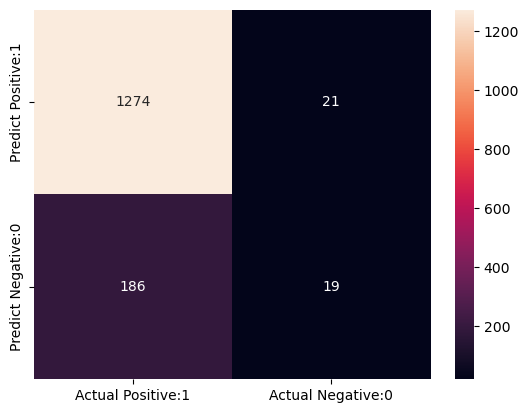

In [49]:
cm2_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm2_matrix, annot=True, fmt='d')
plt.show()

In [50]:
Model_2.coef_

array([[ 0.01662989,  0.42141881,  1.95067783, -1.50806321]])

In [51]:
print('========Train=======')
print(f"Accuracy of model 2 \n{accuracy_score(y2_train, y2_train_Pred)}")
print('========Test=======')
print(f"Accuracy of model 2\n{accuracy_score(y2_test, y2_test_Pred)}")

========Train=======
Accuracy of model 2 
0.8594285714285714
========Test=======
Accuracy of model 2
0.862


### ii. Model 3 : Model with significant attributes given by Model2;analyze model performance

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y2_test, y2_test_Pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1295
           1       0.47      0.09      0.16       205

    accuracy                           0.86      1500
   macro avg       0.67      0.54      0.54      1500
weighted avg       0.82      0.86      0.82      1500



### iii. Model 4: For the Model 2, compute perfor- mance with probability threshold decided based on ROC curve; analyze model performance

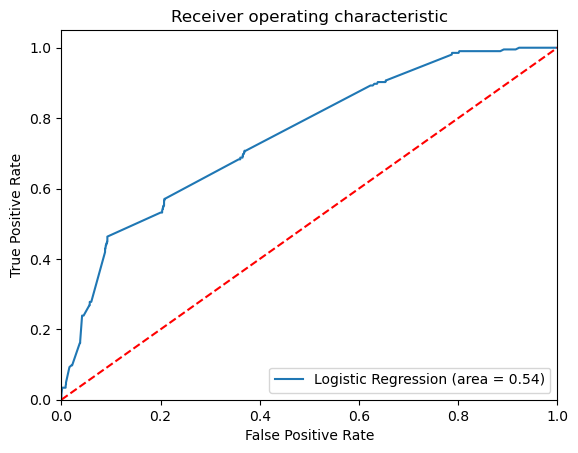

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y2_test, lr_model.predict(x2_test))
fpr, tpr, thresholds = roc_curve(y2_test, lr_model.predict_proba(x2_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Model 5: Model 2 with regularisation imposed; analyze model performance

In [54]:
#import ridge regression library
from sklearn.linear_model import Ridge

#Train the model
ridgeRegressor = Ridge(alpha=0)#here setting the alpha 1
Model_3=ridgeRegressor.fit(x2_train,y2_train)
y_pred_ridge=ridgeRegressor.predict(x2_test)
print(y_pred_ridge)

coefficient_df = pd.DataFrame()
coefficient_df['column_name']=x2_train.columns
coefficient_df['coefficient_values']=pd.Series(ridgeRegressor.coef_)
print(coefficient_df)

# plt.rcParams['figure.figsize']=(15,6)
# plt.bar(coefficient_df["column_name"],coefficient_df["coefficient_values"])

[0.00620456 0.11379514 0.01950858 ... 0.05151233 0.21539271 0.10613912]
                 column_name  coefficient_values
0          X..Vmail.Messages            0.001663
1  X..customer.Service.Calls            0.054627
2     International.Plan_yes            0.325513
3        Voice.Mail.Plan_yes           -0.141510


In [55]:
odds=np.exp(((0.001663*XVmailMessages)+(0.054627*XcustomerServiceCalls)
             +(0.325513*InternationalPlan_yes)-(0.141510*VoiceMailPlan_yes)))
odds/(odds+1)

0.5892321912556613

### b. Tabulate the train and validation results for all the above models

In [56]:
y2_pred_train = lr_model.predict(x2_train)

y2_pred_test = lr_model.predict(x2_test)

### predict_proba method


**predict_proba** method gives the probabilities for the target variable(0 and 1) in this case, in array form.

`0 is for probability of No-Churn` and `1 is for probability of Churn.`

In [57]:
# probability of getting output as 0 - No Churn

lr_model.predict_proba(x2_test)[:,0]

array([0.96460229, 0.92264654, 0.95976802, ..., 0.93302868, 0.79736644,
       0.90138888])

In [58]:
# probability of getting output as 1 - rain

lr_model.predict_proba(x2_test)[:,1]

array([0.03539771, 0.07735346, 0.04023198, ..., 0.06697132, 0.20263356,
       0.09861112])

In [59]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y2_test, y2_pred_test)))

Model accuracy score: 0.8620


Here, **y_test** are the true class labels and **y_pred_test** are the predicted class labels in the test-set.

### c. Analyze model performances and finalize the model


In [60]:
#model1
TP1 = cm[0,0]
TN1 = cm[1,1]
FP1 = cm[0,1]
FN1 = cm[1,0]

#Error Metrics
Accuracy = (TP1 + TN1) / float(TP1 + TN1 + FP1 + FN1)
classification_error = (FP1 + FN1) / float(TP1 + TN1 + FP1 + FN1)
precision = TP1 / float(TP1 + FP1)
recall = TP1 / float(TP1 + FN1)
true_positive_rate = TP1 / float(TP1 + FN1)
false_positive_rate = FP1 / float(FP1 + TN1)
specificity = TN1 / (TN1 + FP1)
print('Accuracy : {0:0.4f}'.format(Accuracy))
print('Classification error : {0:0.4f}'.format(classification_error))
print('Precision : {0:0.4f}'.format(precision))
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
print('Specificity : {0:0.4f}'.format(specificity))

Accuracy : 0.8653
Classification error : 0.1347
Precision : 0.9792
Recall or Sensitivity : 0.8787
True Positive Rate : 0.8787
False Positive Rate : 0.4737
Specificity : 0.5263


In [61]:
#from Model_2
TP = cm2[0,0]
TN = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]

#Error Metrics
Accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)
print('Accuracy : {0:0.4f}'.format(Accuracy))
print('Classification error : {0:0.4f}'.format(classification_error))
print('Precision : {0:0.4f}'.format(precision))
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
print('Specificity : {0:0.4f}'.format(specificity))

Accuracy : 0.8620
Classification error : 0.1380
Precision : 0.9838
Recall or Sensitivity : 0.8726
True Positive Rate : 0.8726
False Positive Rate : 0.5250
Specificity : 0.4750


## since the pression of the model2 is high which was built by using VIF technique, so we consider model 2 as good model